# <span style="color:teal"> Deep Reinforcement Learning for Atari Enduro-v0 </span>

### Import Required Packages

In [19]:
# !pip install keras-rl
# !pip install --no-index -f https://github.com/Kojoley/atari-py/releases atari_py

In [20]:
from __future__ import division
from time import sleep

import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, concatenate, Permute
from keras.layers import Input, Conv2D
from keras.optimizers import Adam
from keras.activations import relu, linear
from keras.layers.advanced_activations import LeakyReLU

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor

***
### RoadRunner Environment

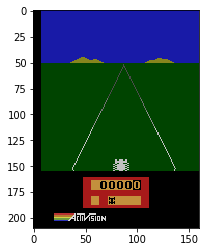

In [21]:
env = gym.make('Enduro-v0')

plt.imshow(env.render(mode='rgb_array'))

#### 1. *Number of possible action*

In [22]:
nb_actions = env.action_space.n
print('Total number of Possible actoin is :', nb_actions)

Total number of Possible actoin is : 9


#### 2. *Taking stack of 4 consecutive frames*

In [23]:
frame_shape = (84, 84)
window_length = 4
input_shape = (window_length,) + frame_shape
print('Input Shape is :', input_shape)

Input Shape is : (4, 84, 84)


***
### Defining class for pre-processing the game_frames

In [24]:
class GameProcess(Processor):
    def process_observation(self, observation):
        img = Image.fromarray(observation)
        img = np.array(img.resize(frame_shape).convert('L'))
        return img.astype('uint8')  

    def process_state_batch(self, batch):
        Processed_batch = batch.astype('float32') / 255.
        return Processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

***
## DeepMind Architecture

In [25]:
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=input_shape))
model.add(Conv2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))
model.add(Conv2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_2 (Permute)          (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        8224      
_________________________________________________________________
activation_6 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
activation_7 (Activation)    (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
activation_8 (Activation)    (None, 7, 7, 64)          0         
__________

***
### Configuring the Agent

#### 1. *Allocating memory for experience replay*

In [26]:
memory = SequentialMemory(limit=1000000, window_length=window_length)

#### 2.* Policy: Epsilon Greedy Exploration*
<span style="color:teal">*Gradually exploration will be decreased*</span>

In [27]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05, nb_steps=1000000)

#### 3. *Compiling DQN Agent*

In [28]:
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy, memory=memory, processor=GameProcess(),
               nb_steps_warmup=50000, gamma=.99, target_model_update=10000, train_interval=4, delta_clip=1.)

In [29]:
dqn.compile(Adam(lr=.00025), metrics=['mae'])

***
## <span style="color:teal"> Training the model </span>

### <span style="color:red">**-  -  Caution   -  -**</span>

In [17]:
history = dqn.fit(env, nb_steps=2000000)

Training for 2000000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 22s 2ms/step - reward: 0.0000e+00
2 episodes - episode_reward: 0.000 [0.000, 0.000] - ale.lives: 0.000

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 19s 2ms/step - reward: 0.0000e+00
2 episodes - episode_reward: 0.000 [0.000, 0.000] - ale.lives: 0.000

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 19s 2ms/step - reward: 0.0000e+00
2 episodes - episode_reward: 0.000 [0.000, 0.000] - ale.lives: 0.000

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 19s 2ms/step - reward: 0.0000e+00: 0s - reward: 0.0000e+0
3 episodes - episode_reward: 0.000 [0.000, 0.000] - ale.lives: 0.000

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 19s 2ms/step - reward: 0.0000e+00
2 episodes - episode_reward: 0.000 [0.000, 0.000] - ale.lives: 0.000

Interval 6 (50000 s

10000/10000 [==============================] - 63s 6ms/step - reward: 0.0000e+00
3 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.008 - mean_q: -0.008 - mean_eps: 0.717 - ale.lives: 0.000

Interval 33 (320000 steps performed)
10000/10000 [==============================] - 62s 6ms/step - reward: 0.0000e+00
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.007 - mean_q: -0.008 - mean_eps: 0.708 - ale.lives: 0.000

Interval 34 (330000 steps performed)
10000/10000 [==============================] - 62s 6ms/step - reward: 0.0000e+00
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.007 - mean_q: -0.008 - mean_eps: 0.699 - ale.lives: 0.000

Interval 35 (340000 steps performed)
10000/10000 [==============================] - 63s 6ms/step - reward: 0.0000e+00
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.007 - mean_q: -0.008 - mean_eps:

10000/10000 [==============================] - 64s 6ms/step - reward: 0.0000e+00
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.006 - mean_q: -0.006 - mean_eps: 0.438 - ale.lives: 0.000

Interval 64 (630000 steps performed)
10000/10000 [==============================] - 65s 6ms/step - reward: 0.0000e+00
3 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.006 - mean_q: -0.006 - mean_eps: 0.429 - ale.lives: 0.000

Interval 65 (640000 steps performed)
10000/10000 [==============================] - 65s 6ms/step - reward: 0.0000e+00
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.006 - mean_q: -0.006 - mean_eps: 0.420 - ale.lives: 0.000

Interval 66 (650000 steps performed)
10000/10000 [==============================] - 63s 6ms/step - reward: 0.0000e+00
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.006 - mean_q: -0.006 - mean_eps:

### <span style="color:blue">**-  -  -  Safe  -  -  -**</span>

In [31]:
dqn.load_weights('dqn_atari_Enduro_.h5f')

***
## <span style="color:teal"> Testing the model </span>

Testing for 1 episodes ...
Episode 1: reward: 174.000, steps: 4423


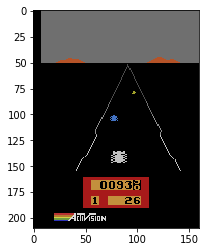

In [32]:
env.reset()

dqn.test(env, nb_episodes=1, visualize=True)

plt.imshow(env.render(mode='rgb_array'))

env.close()

**Trained on: Intel® Xeon® Processor E5, 2.40 GHz, Nvidia Quadro K4200**
***
<span style="color:teal"> [Bhartendu Thakur](https://github.com/matrixBT), Machine Learning & Computing</span>